# Personal Expense Analyzer for Students
**Purpose**: Track bank CSV spends → categorize → visualize trends + anomaly alerts

In [2]:
# Install: Run once in terminal - pip install pandas numpy matplotlib seaborn plotly openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
print("✅ All libraries imported!")

✅ All libraries imported!


In [4]:
import os

# Check if file exists, create if missing
if not os.path.exists('transactions.csv'):
    print("📝 Creating transactions.csv automatically...")
    data = """Date,Amount,Description
2025-11-15,45.50,Amazon ESP32 kit
2025-11-16,12.30,McDonalds lunch
2025-11-17,250.00,Food delivery Swiggy
2025-11-18,89.99,Arduino sensors Amazon
2025-11-19,8.75,Coffee shop"""
    
    with open('transactions.csv', 'w') as f:
        f.write(data)
    print("✅ transactions.csv created!")

# Now safely load
df = pd.read_csv('transactions.csv', parse_dates=['Date'])
print("📊 Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\n📈 Basic stats:")
print(df['Amount'].describe())
print(f"\n📁 Current folder: {os.getcwd()}")
print("📋 Files found:", os.listdir('.'))


📝 Creating transactions.csv automatically...
✅ transactions.csv created!
📊 Dataset shape: (5, 3)

First 5 rows:
        Date  Amount             Description
0 2025-11-15   45.50        Amazon ESP32 kit
1 2025-11-16   12.30         McDonalds lunch
2 2025-11-17  250.00    Food delivery Swiggy
3 2025-11-18   89.99  Arduino sensors Amazon
4 2025-11-19    8.75             Coffee shop

📈 Basic stats:
count      5.000000
mean      81.308000
std       99.801488
min        8.750000
25%       12.300000
50%       45.500000
75%       89.990000
max      250.000000
Name: Amount, dtype: float64

📁 Current folder: c:\Users\Admin\OneDrive\Desktop\projects
📋 Files found: ['.git', 'budget_tracker.ipynb', 'clean_tips.csv', 'complete_pipeline_data.csv', 'data_science_pipeline.ipynb', 'matplotlib_plotter.ipynb', 'numpy_analyzer.ipynb', 'pandas_cleaner.ipynb', 'README.md', 'restaurant_insights.csv', 'sensor_data.csv', 'transactions.csv']


In [5]:
# Categorize spends (case-insensitive keyword matching)
df['Category'] = df['Description'].str.lower().apply(
    lambda x: 'Food' if any(word in x for word in ['food', 'mcdonalds', 'swiggy', 'dominos', 'zomato', 'grocery', 'bigbasket', 'canteen', 'momos'])
    else 'Electronics' if 'amazon' in x or any(word in x for word in ['arduino', 'esp32', 'charger', 'headphones'])
    else 'Transport' if any(word in x for word in ['uber', 'ola'])
    else 'Other')

df['Month'] = df['Date'].dt.month_name()
print("🏷️ Category breakdown:")
print(df['Category'].value_counts())
print("\n📅 Monthly spend:")
monthly_spend = df.groupby(['Month', 'Category'])['Amount'].sum().unstack(fill_value=0)
print(monthly_spend.round(2))

🏷️ Category breakdown:
Category
Electronics    2
Food           2
Other          1
Name: count, dtype: int64

📅 Monthly spend:
Category  Electronics   Food  Other
Month                              
November       135.49  262.3   8.75


C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\1138556169.py:9: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\1138556169.py:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig('spending_heatmap.png', dpi=300, bbox_inches='tight')
C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


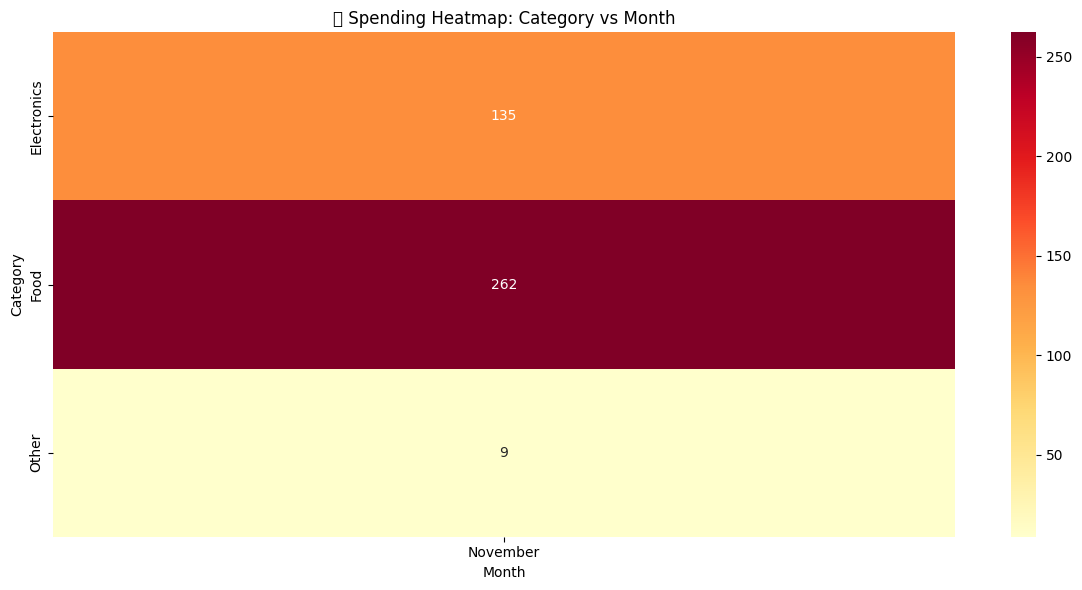

In [6]:
# Setup plotting style
plt.style.use('default')
sns.set_palette("husl")

# Heatmap: Category vs Month spending
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_spend.T, annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('💰 Spending Heatmap: Category vs Month')
plt.tight_layout()
plt.savefig('spending_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [7]:
# Interactive pie chart
fig = px.pie(df, values='Amount', names='Category', 
             title='Interactive Spending Breakdown',
             hover_data=['Description'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_html('budget_pie.html')
fig.show()

# Anomaly detection (top 10% spends)
threshold = df['Amount'].quantile(0.9)
alerts = df[df['Amount'] > threshold][['Date', 'Amount', 'Description', 'Category']]
print("🚨 High spend alerts (>90th percentile):")
print(alerts)


🚨 High spend alerts (>90th percentile):
        Date  Amount           Description Category
2 2025-11-17   250.0  Food delivery Swiggy     Food


In [8]:
# Save cleaned insights
df.to_csv('budget_insights.csv', index=False)
print("💾 Saved: budget_insights.csv")
print("📁 Generated files:")
import os
for file in ['budget_insights.csv', 'spending_heatmap.png', 'budget_pie.html']:
    print(f"   ✅ {file} ({os.path.getsize(file)/1024:.1f} KB)")

💾 Saved: budget_insights.csv
📁 Generated files:
   ✅ budget_insights.csv (0.3 KB)
   ✅ spending_heatmap.png (88.0 KB)
   ✅ budget_pie.html (4737.3 KB)
